In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [2]:
df1 = pd.read_csv("D:\\DataScienceScreenshot\\archive\\carData.csv")

In [3]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df1['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

Lets Apply One Hot Encoding so that we can fit into the ml model 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
dfle = df1
dfle.Fuel_Type = le.fit_transform(dfle.Fuel_Type)
dfle.Seller_Type = le.fit_transform(dfle.Seller_Type)
dfle.Transmission = le.fit_transform(dfle.Transmission)

In [9]:
dfle.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,2,0,1,0
292,jazz,2016,6.40,8.40,12000,2,0,1,0
293,city,2010,3.25,9.90,38000,2,0,1,0
294,amaze,2014,3.75,6.80,33019,2,0,1,0
295,city,2015,8.55,13.09,60076,1,0,1,0
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0
300,brio,2016,5.30,5.90,5464,2,0,1,0


In [10]:
df1['Seller_Type'].unique()

array([0, 1])

In [11]:
countOnes = (dfle['Seller_Type']==0).sum()
countOnes

195

for fit into model we first split the training and testing data

In [12]:
#  In pandas, a DataFrame has two axes:

# Axis 0: Refers to rows.
# Axis 1: Refers to columns.

X = dfle.drop(['Car_Name', 'Selling_Price'], axis=1)

In [13]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [14]:
# this is the target 
y = dfle.Selling_Price


now we split the training and testing data 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
training_data_pred = model.predict(X_train)


In [26]:
model.score(X_test, y_test)

0.8365766715026469

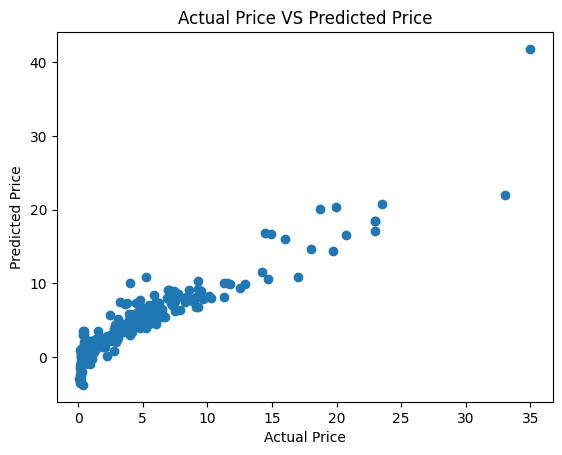

In [69]:
plt.scatter(y_train, training_data_pred)
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [70]:
testing_data_pred = model.predict(X_test)

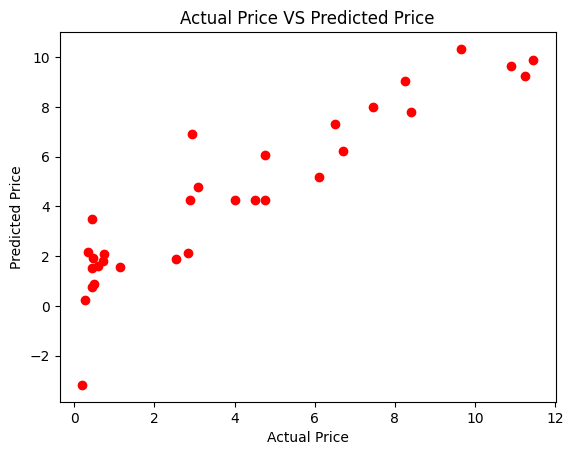

In [77]:
plt.scatter(y_test, testing_data_pred, color="red")
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [27]:
mLasso = Lasso()

In [44]:
mLasso.fit(X_train, y_train)

In [56]:
mLasso.predict(X_test)

In [57]:
mLasso.score(X_test, y_test)

0.8709167941173201

In [72]:
LassTrainData_pred = mLasso.predict(X_train)


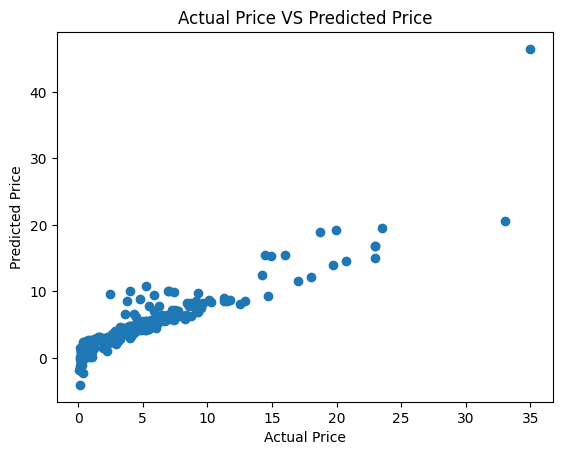

In [73]:
plt.scatter(y_train, LassTrainData_pred)
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [74]:
lassTestData_pred = mLasso.predict(X_test)

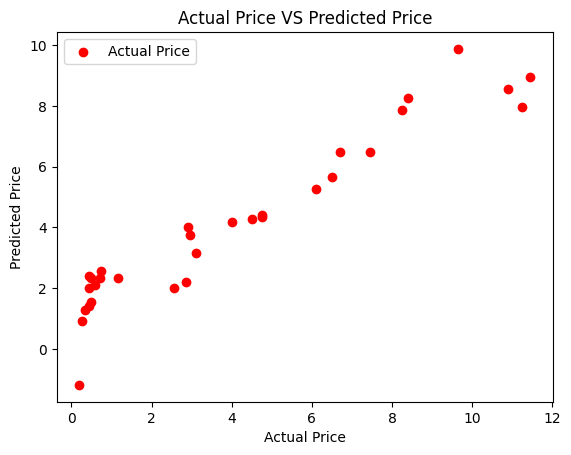

In [76]:
plt.scatter(y_test, lassTestData_pred, color="red", label="Actual Price")
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()